In [1]:
import pandas as pd
print(pd.__version__)


2.2.3


In [2]:
# Lade die CSV-Datei
df = pd.read_csv("AmesHousing.csv")

# Zeige die ersten 5 Zeilen des Datensatzes an
df.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df["SalePrice"], kde=True, bins=30)
plt.title("Verteilung der Hauspreise")
plt.xlabel("Preis")
plt.ylabel("Anzahl")
plt.show()


ModuleNotFoundError: No module named 'seaborn'

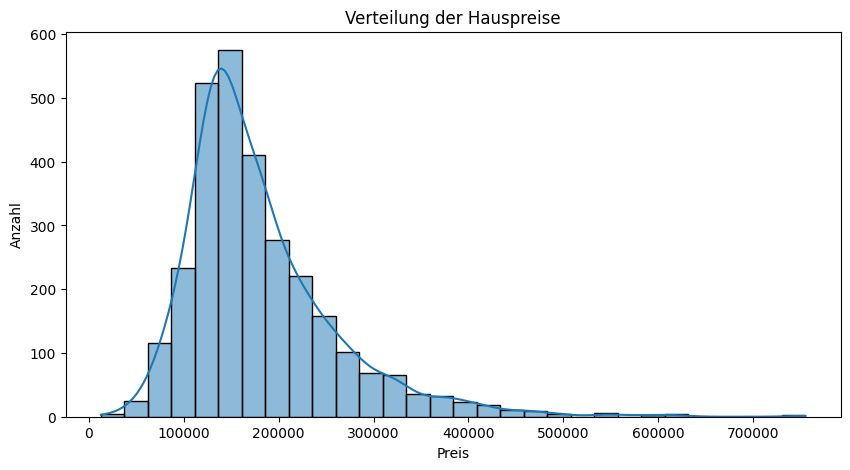

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df["SalePrice"], kde=True, bins=30)
plt.title("Verteilung der Hauspreise")
plt.xlabel("Preis")
plt.ylabel("Anzahl")
plt.show()


In [5]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values[missing_values > 0]


Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Finish      159
Garage Yr Blt      159
Garage Qual        159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin SF 1         1
Garage Cars          1
Electrical           1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Garage Area          1
dtype: int64

In [7]:
# Numerische Spalten mit dem Median füllen
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Kategorische Spalten mit dem häufigsten Wert füllen
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


In [8]:
df = pd.get_dummies(df, drop_first=True)


In [9]:
features = ['LotArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GarageArea']
X = df[features]
y = df['SalePrice']


KeyError: "None of [Index(['LotArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GarageArea'], dtype='object')] are in the [columns]"

In [10]:
print(df.columns)

Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area',
       ...
       'Sale Type_ConLw', 'Sale Type_New', 'Sale Type_Oth', 'Sale Type_VWD',
       'Sale Type_WD ', 'Sale Condition_AdjLand', 'Sale Condition_Alloca',
       'Sale Condition_Family', 'Sale Condition_Normal',
       'Sale Condition_Partial'],
      dtype='object', length=263)


In [11]:
for col in features:
    if col not in df.columns:
        print(f"⚠️ Spalte fehlt: {col}")

⚠️ Spalte fehlt: LotArea
⚠️ Spalte fehlt: OverallQual
⚠️ Spalte fehlt: TotalBsmtSF
⚠️ Spalte fehlt: 1stFlrSF
⚠️ Spalte fehlt: GarageArea


In [12]:
df = pd.get_dummies(df, drop_first=True)  # Dummy-Variablen für Kategorische Daten
df = df.copy()  # Vermeidet Pandas-Warnungen

In [13]:
print([col for col in df.columns if 'Garage' in col])  # Beispiel für 'GarageArea'

['Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Garage Type_Attchd', 'Garage Type_Basment', 'Garage Type_BuiltIn', 'Garage Type_CarPort', 'Garage Type_Detchd', 'Garage Finish_RFn', 'Garage Finish_Unf', 'Garage Qual_Fa', 'Garage Qual_Gd', 'Garage Qual_Po', 'Garage Qual_TA', 'Garage Cond_Fa', 'Garage Cond_Gd', 'Garage Cond_Po', 'Garage Cond_TA']


In [14]:
print(df.columns)

Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area',
       ...
       'Sale Type_ConLw', 'Sale Type_New', 'Sale Type_Oth', 'Sale Type_VWD',
       'Sale Type_WD ', 'Sale Condition_AdjLand', 'Sale Condition_Alloca',
       'Sale Condition_Family', 'Sale Condition_Normal',
       'Sale Condition_Partial'],
      dtype='object', length=263)


In [15]:
df.columns = df.columns.str.strip()

In [16]:
missing_features = [col for col in features if col not in df.columns]
print("Fehlende Spalten:", missing_features)


Fehlende Spalten: ['LotArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GarageArea']


In [17]:
[col for col in df.columns if "Bsmt" in col]  # Beispiel für Basement-Spalten
[col for col in df.columns if "Garage" in col]  # Beispiel für Garage-Spalten


['Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Garage Type_Attchd',
 'Garage Type_Basment',
 'Garage Type_BuiltIn',
 'Garage Type_CarPort',
 'Garage Type_Detchd',
 'Garage Finish_RFn',
 'Garage Finish_Unf',
 'Garage Qual_Fa',
 'Garage Qual_Gd',
 'Garage Qual_Po',
 'Garage Qual_TA',
 'Garage Cond_Fa',
 'Garage Cond_Gd',
 'Garage Cond_Po',
 'Garage Cond_TA']

In [18]:
features = ['Lot Area', 'Overall Qual', 'Total Bsmt SF', '1st Flr SF', 'Garage Area']
X = df[features]
y = df['SalePrice']


In [19]:
missing_features = [col for col in features if col not in df.columns]
print("Fehlende Spalten:", missing_features)


Fehlende Spalten: []


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Daten in Trainings- und Testset aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modell initialisieren
model = LinearRegression()

# Modell trainieren
model.fit(X_train, y_train)


ModuleNotFoundError: No module named 'sklearn'

In [21]:
!python3 -m pip install scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 6.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 6.0 MB/s eta 0:00:00a 0:00:01


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Daten in Trainings- und Testset aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modell initialisieren
model = LinearRegression()

# Modell trainieren
model.fit(X_train, y_train)


LinearRegression()

In [23]:
# Vorhersagen auf dem Testset machen
y_pred = model.predict(X_test)

# Fehler berechnen
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Ergebnisse ausgeben
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 28935.23
Mean Squared Error (MSE): 1856786411.47
R² Score: 0.7684


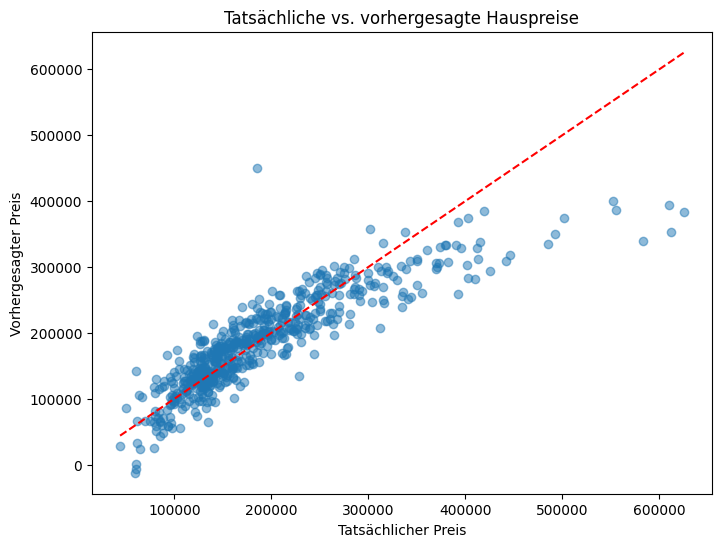

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Tatsächlicher Preis")
plt.ylabel("Vorhergesagter Preis")
plt.title("Tatsächliche vs. vorhergesagte Hauspreise")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # Perfekte Linie
plt.show()


In [25]:
features = ['Lot Area', 'Overall Qual', 'Total Bsmt SF', '1st Flr SF', 'Garage Area', 
            'Year Built', 'Gr Liv Area', 'Full Bath', 'Fireplaces']
X = df[features]


In [26]:
# Vorhersagen auf dem Testset machen
y_pred = model.predict(X_test)

# Fehler berechnen
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Ergebnisse ausgeben
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 28935.23
Mean Squared Error (MSE): 1856786411.47
R² Score: 0.7684


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test-Split mit skalierten Daten
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [28]:
# Vorhersagen auf dem Testset machen
y_pred = model.predict(X_test)

# Fehler berechnen
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Ergebnisse ausgeben
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 9 features, but LinearRegression is expecting 5 features as input.

In [29]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [2]:
# Vorhersagen auf dem Testset machen
y_pred = model.predict(X_test)

# Fehler berechnen
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Ergebnisse ausgeben
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")

NameError: name 'X_test' is not defined

In [1]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


NameError: name 'X_train' is not defined

In [3]:
from sklearn.model_selection import train_test_split

# Features und Zielvariable erneut definieren (falls sie verloren gegangen sind)
features = ['Lot Area', 'Overall Qual', 'Total Bsmt SF', '1st Flr SF', 'Garage Area', 
            'Year Built', 'Gr Liv Area', 'Full Bath', 'Fireplaces']
X = df[features]
y = df['SalePrice']

# Daten in Trainings- und Testsets aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Teste, ob die Variablen vorhanden sind
print(f"X_train Shape: {X_train.shape}, y_train Shape: {y_train.shape}")


NameError: name 'df' is not defined

In [4]:
import pandas as pd

# Datensatz erneut laden
df = pd.read_csv("AmesHousing.csv")

# Spaltennamen bereinigen (falls Leerzeichen vorhanden sind)
df.columns = df.columns.str.strip()

# Zeige die ersten 5 Zeilen zur Kontrolle
df.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
from sklearn.model_selection import train_test_split

# Features und Zielvariable definieren
features = ['Lot Area', 'Overall Qual', 'Total Bsmt SF', '1st Flr SF', 'Garage Area', 
            'Year Built', 'Gr Liv Area', 'Full Bath', 'Fireplaces']
X = df[features]
y = df['SalePrice']

# Daten in Trainings- und Testsets aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Teste, ob die Variablen vorhanden sind
print(f"X_train Shape: {X_train.shape}, y_train Shape: {y_train.shape}")


X_train Shape: (2344, 9), y_train Shape: (2344,)


In [6]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# XGBoost-Modell initialisieren
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Modell trainieren
model.fit(X_train, y_train)

# Vorhersagen auf dem Testset machen
y_pred = model.predict(X_test)

# Fehler berechnen
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Ergebnisse ausgeben
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 18067.53
Mean Squared Error (MSE): 813058816.00
R² Score: 0.8986


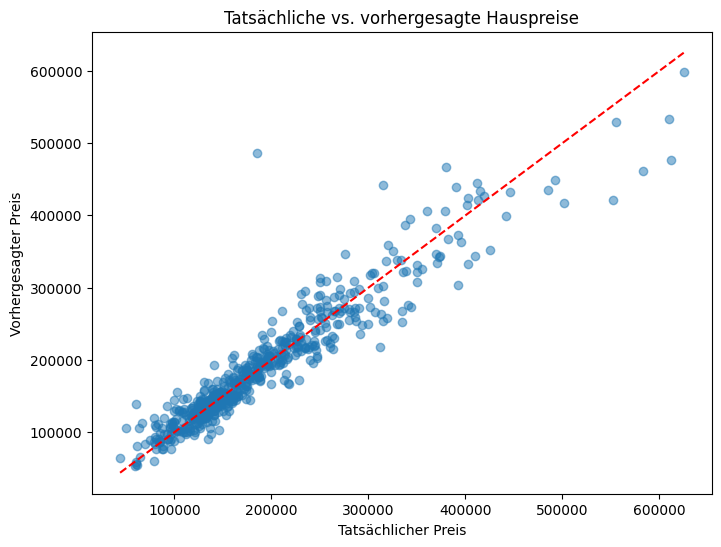

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Tatsächlicher Preis")
plt.ylabel("Vorhergesagter Preis")
plt.title("Tatsächliche vs. vorhergesagte Hauspreise")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # Perfekte Linie
plt.show()
